In [1]:
# Importing the required libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_dataset = pd.read_csv("astro_train.csv")
test_dataset = pd.read_csv("astro_test.csv")

train_dataset = train_dataset.set_index("id")
test_dataset = test_dataset.set_index("id")
train_dataset.head()

,dered_i,dered_z,dered_u,dered_g,dered_r,err_i,err_z,err_u,err_g,err_r,...,skyVersion,run,rerun,camCol,field,obj,photoz,#ra,dec,class
id,,,,,,,,,,,,,,,,,,,,,
0,15.1459,14.9723,18.6394,16.4080,15.4896,0.00195,0.00406,0.02796,0.00279,0.00197,...,1,745,40,2,518,5,2.64988,236.22077,-0.58795,0
1,17.3579,17.3498,18.5273,17.6527,17.4296,0.00757,0.02498,0.02484,0.00536,0.00577,...,1,745,40,2,518,8,2.63438,236.22135,-0.46320,0
2,20.6154,19.7785,25.4019,23.4824,22.5504,0.10071,0.16768,0.75381,0.46380,0.35679,...,1,745,40,2,518,9,1.65738,236.22055,-0.46434,0
3,15.0188,14.9927,16.7971,15.5712,15.1534,0.00183,0.00411,0.00820,0.00195,0.00171,...,1,745,40,2,518,12,2.28431,236.22224,-0.61553,0
4,20.3008,21.6454,23.7314,21.7139,20.9195,0.21194,1.86698,2.73388,0.27544,0.21740,...,1,745,40,2,518,13,1.34673,236.22307,-0.61710,1


In [3]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45000 entries, 0 to 44999
Data columns (total 21 columns):
dered_i         45000 non-null float64
dered_z         45000 non-null float64
dered_u         45000 non-null float64
dered_g         45000 non-null float64
dered_r         45000 non-null float64
err_i           45000 non-null float64
err_z           45000 non-null float64
err_u           45000 non-null float64
err_g           45000 non-null float64
err_r           45000 non-null float64
extinction_r    45000 non-null float64
skyVersion      45000 non-null int64
run             45000 non-null int64
rerun           45000 non-null int64
camCol          45000 non-null int64
field           45000 non-null int64
obj             45000 non-null int64
photoz          45000 non-null float64
#ra             45000 non-null float64
dec             45000 non-null float64
class           45000 non-null int64
dtypes: float64(14), int64(7)
memory usage: 7.6 MB


In [4]:
train_dataset.isnull().sum()

dered_i         0
dered_z         0
dered_u         0
dered_g         0
dered_r         0
err_i           0
err_z           0
err_u           0
err_g           0
err_r           0
extinction_r    0
skyVersion      0
run             0
rerun           0
camCol          0
field           0
obj             0
photoz          0
#ra             0
dec             0
class           0
dtype: int64

In [5]:
cleaned_train_dataset = train_dataset.drop(["skyVersion","run","rerun","camCol"], axis=1)
cleaned_test_dataset = test_dataset.drop(["skyVersion","run","rerun","camCol"], axis=1)

In [6]:
cleaned_train_dataset.isnull().sum()

dered_i         0
dered_z         0
dered_u         0
dered_g         0
dered_r         0
err_i           0
err_z           0
err_u           0
err_g           0
err_r           0
extinction_r    0
field           0
obj             0
photoz          0
#ra             0
dec             0
class           0
dtype: int64

In [7]:
nadropped_train_dataset = cleaned_train_dataset.dropna(axis=0, how="any")

In [8]:
nadropped_train_dataset.isnull().sum()

dered_i         0
dered_z         0
dered_u         0
dered_g         0
dered_r         0
err_i           0
err_z           0
err_u           0
err_g           0
err_r           0
extinction_r    0
field           0
obj             0
photoz          0
#ra             0
dec             0
class           0
dtype: int64

In [9]:
nadropped_train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45000 entries, 0 to 44999
Data columns (total 17 columns):
dered_i         45000 non-null float64
dered_z         45000 non-null float64
dered_u         45000 non-null float64
dered_g         45000 non-null float64
dered_r         45000 non-null float64
err_i           45000 non-null float64
err_z           45000 non-null float64
err_u           45000 non-null float64
err_g           45000 non-null float64
err_r           45000 non-null float64
extinction_r    45000 non-null float64
field           45000 non-null int64
obj             45000 non-null int64
photoz          45000 non-null float64
#ra             45000 non-null float64
dec             45000 non-null float64
class           45000 non-null int64
dtypes: float64(14), int64(3)
memory usage: 6.2 MB


In [10]:
nadropped_train_dataset["field"] = nadropped_train_dataset["field"].astype(float)
nadropped_train_dataset["obj"] = nadropped_train_dataset["obj"].astype(float)
nadropped_train_dataset["class"] = nadropped_train_dataset["class"].astype(float)


In [11]:
nadropped_train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45000 entries, 0 to 44999
Data columns (total 17 columns):
dered_i         45000 non-null float64
dered_z         45000 non-null float64
dered_u         45000 non-null float64
dered_g         45000 non-null float64
dered_r         45000 non-null float64
err_i           45000 non-null float64
err_z           45000 non-null float64
err_u           45000 non-null float64
err_g           45000 non-null float64
err_r           45000 non-null float64
extinction_r    45000 non-null float64
field           45000 non-null float64
obj             45000 non-null float64
photoz          45000 non-null float64
#ra             45000 non-null float64
dec             45000 non-null float64
class           45000 non-null float64
dtypes: float64(17)
memory usage: 6.2 MB


In [12]:
cleaned_train_dataset=cleaned_train_dataset.rename(columns={"#ra": "ra"})
cleaned_train_dataset=cleaned_train_dataset.rename(columns={"class": "aclass"})

nadropped_train_dataset=nadropped_train_dataset.rename(columns={"#ra": "ra"})
nadropped_train_dataset=nadropped_train_dataset.rename(columns={"class": "aclass"})

[Text(0, 0.5, 'aclass'), Text(0.5, 0, 'dered_i')]

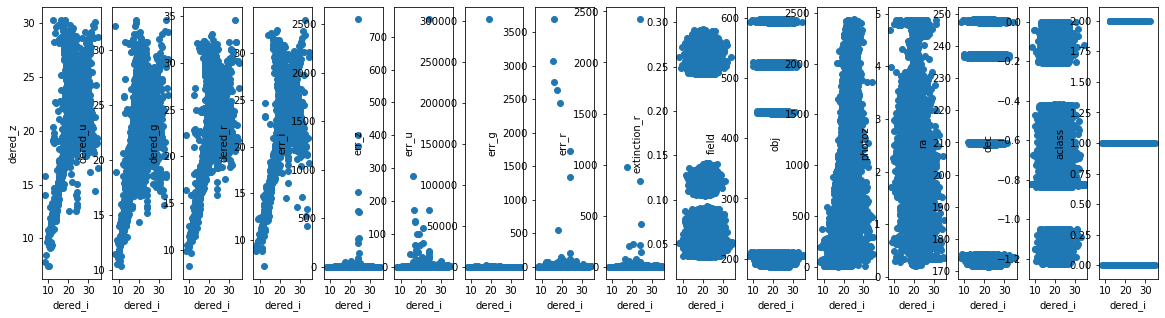

In [13]:
fig, (ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12,ax13,ax14,ax15,ax16) = plt.subplots(1,16, figsize=(20,5))
ax1.scatter(nadropped_train_dataset.dered_i, nadropped_train_dataset.dered_z)
ax1.set(xlabel="dered_i", ylabel="dered_z")

ax2.scatter(nadropped_train_dataset.dered_i, nadropped_train_dataset.dered_u)
ax2.set(xlabel="dered_i", ylabel="dered_u")

ax3.scatter(nadropped_train_dataset.dered_i, nadropped_train_dataset.dered_g)
ax3.set(xlabel="dered_i", ylabel="dered_g")

ax4.scatter(nadropped_train_dataset.dered_i, nadropped_train_dataset.dered_r)
ax4.set(xlabel="dered_i", ylabel="dered_r")

ax5.scatter(nadropped_train_dataset.dered_i, nadropped_train_dataset.err_i)
ax5.set(xlabel="dered_i", ylabel="err_i")

ax6.scatter(nadropped_train_dataset.dered_i, nadropped_train_dataset.err_z)
ax6.set(xlabel="dered_i", ylabel="err_z")

ax7.scatter(nadropped_train_dataset.dered_i, nadropped_train_dataset.err_u)
ax7.set(xlabel="dered_i", ylabel="err_u")

ax8.scatter(nadropped_train_dataset.dered_i, nadropped_train_dataset.err_g)
ax8.set(xlabel="dered_i", ylabel="err_g")

ax9.scatter(nadropped_train_dataset.dered_i, nadropped_train_dataset.err_r)
ax9.set(xlabel="dered_i", ylabel="err_r")

ax10.scatter(nadropped_train_dataset.dered_i, nadropped_train_dataset.extinction_r)
ax10.set(xlabel="dered_i", ylabel="extinction_r")

ax11.scatter(nadropped_train_dataset.dered_i, nadropped_train_dataset.field)
ax11.set(xlabel="dered_i", ylabel="field")

ax12.scatter(nadropped_train_dataset.dered_i, nadropped_train_dataset.obj)
ax12.set(xlabel="dered_i", ylabel="obj")

ax13.scatter(nadropped_train_dataset.dered_i, nadropped_train_dataset.photoz)
ax13.set(xlabel="dered_i", ylabel="photoz")

ax14.scatter(nadropped_train_dataset.dered_i, nadropped_train_dataset.ra)
ax14.set(xlabel="dered_i", ylabel="ra")

ax15.scatter(nadropped_train_dataset.dered_i, nadropped_train_dataset.dec)
ax15.set(xlabel="dered_i", ylabel="dec")

ax16.scatter(nadropped_train_dataset.dered_i, nadropped_train_dataset.aclass)
ax16.set(xlabel="dered_i", ylabel="aclass")



[Text(0, 0.5, 'aclass'), Text(0.5, 0, 'dered_z')]

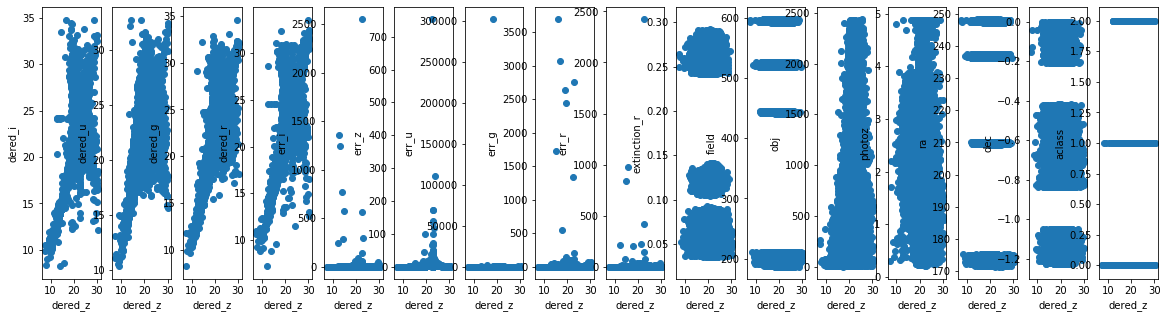

In [14]:
fig, (ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12,ax13,ax14,ax15,ax16) = plt.subplots(1,16, figsize=(20,5))
ax1.scatter(nadropped_train_dataset.dered_z, nadropped_train_dataset.dered_i)
ax1.set(xlabel="dered_z", ylabel="dered_i")

ax2.scatter(nadropped_train_dataset.dered_z, nadropped_train_dataset.dered_u)
ax2.set(xlabel="dered_z", ylabel="dered_u")

ax3.scatter(nadropped_train_dataset.dered_z, nadropped_train_dataset.dered_g)
ax3.set(xlabel="dered_z", ylabel="dered_g")

ax4.scatter(nadropped_train_dataset.dered_z, nadropped_train_dataset.dered_r)
ax4.set(xlabel="dered_z", ylabel="dered_r")

ax5.scatter(nadropped_train_dataset.dered_z, nadropped_train_dataset.err_i)
ax5.set(xlabel="dered_z", ylabel="err_i")

ax6.scatter(nadropped_train_dataset.dered_z, nadropped_train_dataset.err_z)
ax6.set(xlabel="dered_z", ylabel="err_z")

ax7.scatter(nadropped_train_dataset.dered_z, nadropped_train_dataset.err_u)
ax7.set(xlabel="dered_z", ylabel="err_u")

ax8.scatter(nadropped_train_dataset.dered_z, nadropped_train_dataset.err_g)
ax8.set(xlabel="dered_z", ylabel="err_g")

ax9.scatter(nadropped_train_dataset.dered_z, nadropped_train_dataset.err_r)
ax9.set(xlabel="dered_z", ylabel="err_r")

ax10.scatter(nadropped_train_dataset.dered_z, nadropped_train_dataset.extinction_r)
ax10.set(xlabel="dered_z", ylabel="extinction_r")

ax11.scatter(nadropped_train_dataset.dered_z, nadropped_train_dataset.field)
ax11.set(xlabel="dered_z", ylabel="field")

ax12.scatter(nadropped_train_dataset.dered_z, nadropped_train_dataset.obj)
ax12.set(xlabel="dered_z", ylabel="obj")

ax13.scatter(nadropped_train_dataset.dered_z, nadropped_train_dataset.photoz)
ax13.set(xlabel="dered_z", ylabel="photoz")

ax14.scatter(nadropped_train_dataset.dered_z, nadropped_train_dataset.ra)
ax14.set(xlabel="dered_z", ylabel="ra")

ax15.scatter(nadropped_train_dataset.dered_z, nadropped_train_dataset.dec)
ax15.set(xlabel="dered_z", ylabel="dec")

ax16.scatter(nadropped_train_dataset.dered_z, nadropped_train_dataset.aclass)
ax16.set(xlabel="dered_z", ylabel="aclass")

[Text(0, 0.5, 'dered_z'), Text(0.5, 0, 'aclass')]

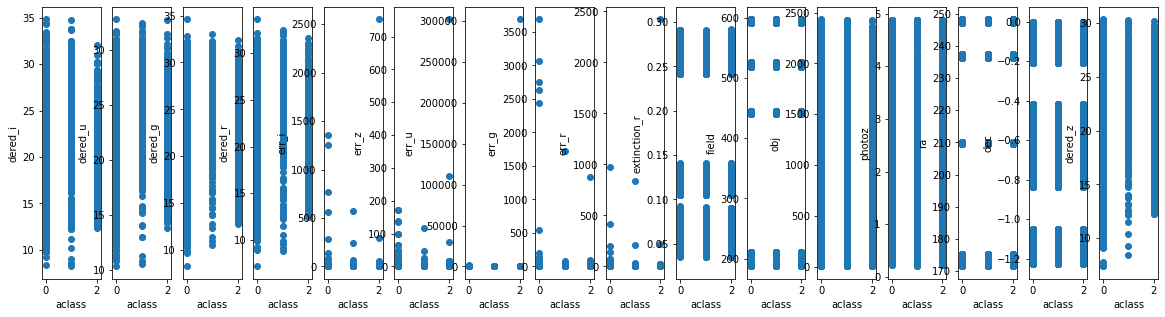

In [15]:
fig, (ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12,ax13,ax14,ax15,ax16) = plt.subplots(1,16, figsize=(20,5))
ax1.scatter(nadropped_train_dataset.aclass, nadropped_train_dataset.dered_i)
ax1.set(xlabel="aclass", ylabel="dered_i")

ax2.scatter(nadropped_train_dataset.aclass, nadropped_train_dataset.dered_u)
ax2.set(xlabel="aclass", ylabel="dered_u")

ax3.scatter(nadropped_train_dataset.aclass, nadropped_train_dataset.dered_g)
ax3.set(xlabel="aclass", ylabel="dered_g")

ax4.scatter(nadropped_train_dataset.aclass, nadropped_train_dataset.dered_r)
ax4.set(xlabel="aclass", ylabel="dered_r")

ax5.scatter(nadropped_train_dataset.aclass, nadropped_train_dataset.err_i)
ax5.set(xlabel="aclass", ylabel="err_i")

ax6.scatter(nadropped_train_dataset.aclass, nadropped_train_dataset.err_z)
ax6.set(xlabel="aclass", ylabel="err_z")

ax7.scatter(nadropped_train_dataset.aclass, nadropped_train_dataset.err_u)
ax7.set(xlabel="aclass", ylabel="err_u")

ax8.scatter(nadropped_train_dataset.aclass, nadropped_train_dataset.err_g)
ax8.set(xlabel="aclass", ylabel="err_g")

ax9.scatter(nadropped_train_dataset.aclass, nadropped_train_dataset.err_r)
ax9.set(xlabel="aclass", ylabel="err_r")

ax10.scatter(nadropped_train_dataset.aclass, nadropped_train_dataset.extinction_r)
ax10.set(xlabel="aclass", ylabel="extinction_r")

ax11.scatter(nadropped_train_dataset.aclass, nadropped_train_dataset.field)
ax11.set(xlabel="aclass", ylabel="field")

ax12.scatter(nadropped_train_dataset.aclass, nadropped_train_dataset.obj)
ax12.set(xlabel="aclass", ylabel="obj")

ax13.scatter(nadropped_train_dataset.aclass, nadropped_train_dataset.photoz)
ax13.set(xlabel="aclass", ylabel="photoz")

ax14.scatter(nadropped_train_dataset.aclass, nadropped_train_dataset.ra)
ax14.set(xlabel="aclass", ylabel="ra")

ax15.scatter(nadropped_train_dataset.aclass, nadropped_train_dataset.dec)
ax15.set(xlabel="aclass", ylabel="dec")

ax16.scatter(nadropped_train_dataset.aclass, nadropped_train_dataset.dered_z)
ax16.set(xlabel="aclass", ylabel="dered_z")

In [16]:
cleaned_train_dataset = cleaned_train_dataset.drop(["dered_r"], axis=1)
cleaned_test_dataset = cleaned_test_dataset.drop(["dered_r"], axis=1)

In [17]:
cleaned_train_dataset = cleaned_train_dataset.drop(["err_i"], axis=1)
cleaned_test_dataset = cleaned_test_dataset.drop(["err_i"], axis=1)

cleaned_train_dataset = cleaned_train_dataset.drop(["err_z"], axis=1)
cleaned_test_dataset = cleaned_test_dataset.drop(["err_z"], axis=1)

cleaned_train_dataset = cleaned_train_dataset.drop(["err_u"], axis=1)
cleaned_test_dataset = cleaned_test_dataset.drop(["err_u"], axis=1)

cleaned_train_dataset = cleaned_train_dataset.drop(["err_g"], axis=1)
cleaned_test_dataset = cleaned_test_dataset.drop(["err_g"], axis=1)

cleaned_train_dataset = cleaned_train_dataset.drop(["extinction_r"], axis=1)
cleaned_test_dataset = cleaned_test_dataset.drop(["extinction_r"], axis=1)

cleaned_train_dataset = cleaned_train_dataset.drop(["photoz"], axis=1)
cleaned_test_dataset = cleaned_test_dataset.drop(["photoz"], axis=1)

In [18]:
cleaned_train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45000 entries, 0 to 44999
Data columns (total 10 columns):
dered_i    45000 non-null float64
dered_z    45000 non-null float64
dered_u    45000 non-null float64
dered_g    45000 non-null float64
err_r      45000 non-null float64
field      45000 non-null int64
obj        45000 non-null int64
ra         45000 non-null float64
dec        45000 non-null float64
aclass     45000 non-null int64
dtypes: float64(7), int64(3)
memory usage: 3.8 MB


In [19]:
X = cleaned_train_dataset[["field","obj","ra","dec"]]
y = cleaned_train_dataset["aclass"]

In [20]:
from sklearn.model_selection import train_test_split
# here I used 20% data for test_data and 80% as train_data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [21]:
from sklearn.svm import SVR
regressor = SVR()

In [ ]:
regressor.fit(X_train, y_train)

In [ ]:
y_pred = regressor.predict(X_test)
# Printing the R^2 score
regressor.score(X_test, y_test)

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_pred, y_test)
print("Mean absolute error:", mae)

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {'C':[0.01, 0.1], 'epsilon':[0.01, 0.1]}
regressor = SVR(verbose=2)
clf = GridSearchCV(regressor, parameters, cv=5)  # Here cv means cross validation sets(number of sets in which the data will be divided)
clf.fit(X_train, y_train)

In [ ]:
regressor.fit(X, y)

In [ ]:
cleaned_test_dataset.head()

In [ ]:
X = cleaned_test_dataset
y_pred = regressor.predict(X)


In [ ]:
y_pred = y_pred.astype(int)

In [ ]:
y = pd.DataFrame({"id":X.index,"class":y_pred})



In [ ]:
y.head()

In [ ]:
y.to_csv("aborules.csv",index=False)